# **Ejercicio 1**

Consiste en identificar los cinco deportes más importantes según el mayor número de medallas otorgadas en el año 2016, y luego realizar el siguiente análisis:

- Genere un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.

- Trace un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016.

- Descubre qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.

- Observe la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016.

## **Los 5 deportes más importantes en el año 2016**

**Objetivo:** identificar los cinco deportes más importantes según el mayor número de medallas otorgadas en el año 2016. 

In [11]:
# Librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Primero, se importa la base de datos desde un archivo CSV y selecciona solo las columnas '*Sex*', *Age*', '*Weight*', '*Team*', '*Year*', '*Sport*', y '*Medal*' dado que estas son las columnas relevantes para el análisis que se va a realizar, lo que optimiza la carga de datos al evitar columnas innecesarias.

In [12]:
# Conjunto de datos
olympics_url = "C:/Users/sofmo/Desktop/athlete_events.csv"
olympics= pd.read_csv(olympics_url, usecols=['Sex', 'Age', 'Weight','Team','Year','Sport','Medal'])
olympics.head()

,Sex,Age,Weight,Team,Year,Sport,Medal
0,M,24.0,80.0,China,1992,Basketball,NaN
1,M,23.0,60.0,China,2012,Judo,NaN
2,M,24.0,NaN,Denmark,1920,Football,NaN
3,M,34.0,NaN,Denmark/Sweden,1900,Tug-Of-War,Gold
4,F,21.0,82.0,Netherlands,1988,Speed Skating,NaN


Se filtra el DataFrame para incluir únicamente los registros correspondientes al año 2016 y se eliminan las filas en las que no se ha ganado una medalla.

In [13]:
olympics2016 = olympics.loc[olympics['Year']==2016]
olympics2016 =  olympics2016[olympics2016['Medal'].notna()]
olympics2016.head()

,Sex,Age,Weight,Team,Year,Sport,Medal
158,M,21.0,90.0,Italy,2016,Rowing,Bronze
161,F,21.0,49.0,Azerbaijan,2016,Taekwondo,Bronze
175,M,31.0,86.0,France,2016,Handball,Silver
450,M,26.0,80.0,Iran,2016,Wrestling,Bronze
794,M,24.0,62.0,Russia,2016,Gymnastics,Silver


Se realiza un conteo de las medallas ganadas en cada deporte y se muestran así los cinco deportes más importantes según el mayor número de medallas otorgadas en el año de interés. 

In [14]:
top5sports = olympics2016['Sport'].value_counts().head(5)

Los cinco deportes más importantes según el mayor número de medallas otorgadas en el año 2016 son: 

| Deporte   | Número de Medallas |
|-----------|--------------------|
| Atletismo | 192                |
| Natación  | 191                |
| Remo      | 144                |
| Fútbol    | 106                |
| Hockey    | 99                 |


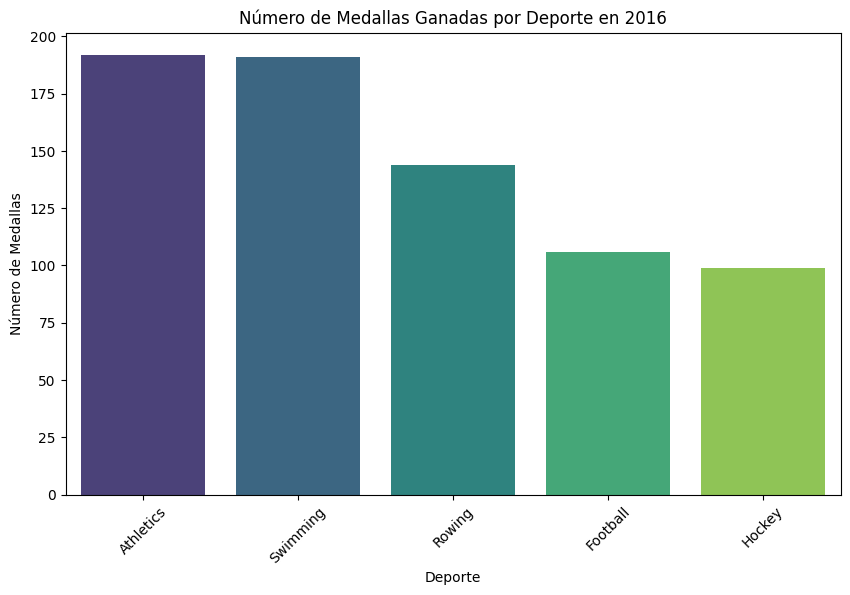

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top5sports.index, y=top5sports.values, palette="viridis")
plt.title('Número de Medallas Ganadas por Deporte en 2016')
plt.xlabel('Deporte')
plt.ylabel('Número de Medallas')
plt.xticks(rotation=45)
plt.show()

El gráfico muestra que **Atletismo** y **Natación** fueron los deportes con más medallas ganadas en los Juegos Olímpicos de 2016, ambos con casi 200 medallas, indicando su alta participación. **Remo** ocupa el tercer lugar con 144 medallas, seguido por **Fútbol** y **Hockey**, con 106 y 99 medallas respectivamente, reflejando una menor cantidad de eventos o participación en comparación con los dos deportes principales.

## **Edad de los ganadores de medallas en los cinco principales deportes**

**Objetivo:** Representar la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016.

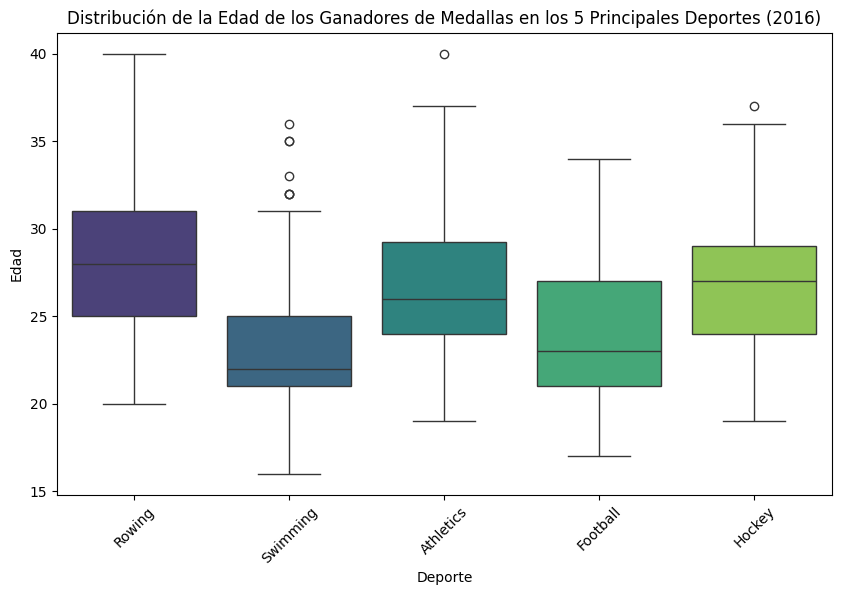

In [16]:
top5_sports = olympics2016['Sport'].value_counts().head(5).index
top5_sports_data = olympics2016[olympics2016['Sport'].isin(top5_sports)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sport', y='Age', data=top5_sports_data, palette="viridis")
plt.title('Distribución de la Edad de los Ganadores de Medallas en los 5 Principales Deportes (2016)')
plt.xlabel('Deporte')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

El gráfico de caja muestra que la distribución de la edad de los ganadores de medallas en los cinco deportes más destacados en 2016 varía notablemente. **Remo** presenta la mediana de edad más alta, cerca de los 30 años, lo que indica que los medallistas en este deporte tienden a ser mayores. En contraste, **Natación** tiene la mediana de edad más baja, alrededor de 23 años, aunque se observan varios valores atípicos que indican la presencia de nadadores mayores. **Atletismo** y **Fútbol** tienen medianas de edad similares, cercanas a los 26 años, mientras que **Hockey** muestra una mediana ligeramente superior a los 25 años. Esto sugiere que los deportistas más jóvenes tienden a destacarse en Natación, mientras que en Remo predominan los atletas de mayor edad.

## **Equipos nacionales con mayor número de medallas en los principales deportes**

**Objetivo**: Descubrir qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.

Para lograr este objetivo, se agrupan los datos por equipo y se cuenta el número de medallas ganadas por cada uno. Luego, los equipos se ordenan de forma descendente según el total de medallas, y se seleccionan los 10 equipos nacionales con el mayor número de estas en los deportes seleccionados.

In [17]:
team_medals = top5_sports_data.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)

| Posición | Equipo Nacional | Número de Medallas |
|----------|-----------------|--------------------|
| 1        | Estados Unidos  | 127                |
| 2        | Alemania        | 88                 |
| 3        | Gran Bretaña    | 69                 |
| 4        | Canadá          | 45                 |
| 5        | Australia       | 43                 |
| 6        | Países Bajos    | 34                 |
| 7        | Jamaica         | 30                 |
| 8        | Suecia          | 21                 |
| 9        | Francia         | 20                 |
| 10       | Brasil          | 19                 |

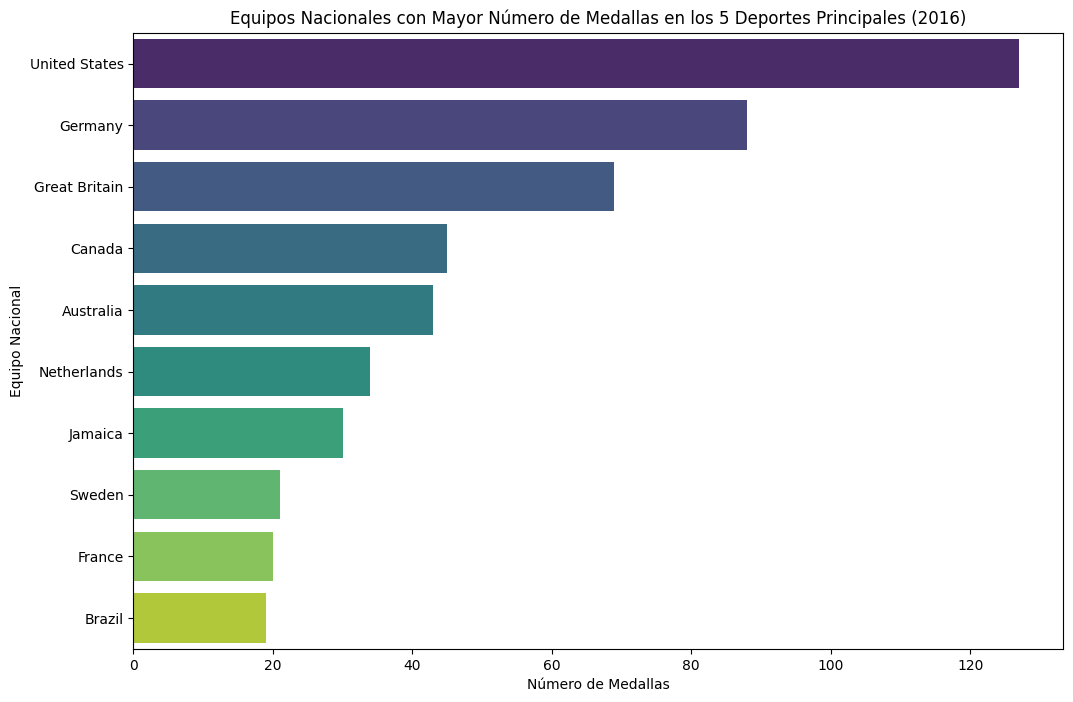

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=team_medals.values, y=team_medals.index, palette="viridis")
plt.title('Equipos Nacionales con Mayor Número de Medallas en los 5 Deportes Principales (2016)')
plt.xlabel('Número de Medallas')
plt.ylabel('Equipo Nacional')
plt.show()

El gráfico muestra que **Estados Unidos** dominó en los cinco deportes principales de los Juegos Olímpicos de 2016, con más de 120 medallas. Le siguen **Alemania** y **Gran Bretaña** con alrededor de 90 y 80 medallas respectivamente. **Canadá**, **Australia**, y otros países como **Países Bajos**, **Jamaica**, **Suecia**, **Francia**, y **Brasil** también tuvieron un rendimiento notable, aunque con un menor número de medallas.

## **Peso medio de los atletas ganadores en los principales deportes**

**Objetivo:** Observar la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016

Para esto, se agrupan los datos por deporte y sexo, y se calcula el peso medio de los atletas en cada grupo. Luego, los resultados se reorganizan en un nuevo DataFrame para facilitar su análisis y visualización.

In [19]:
average_weight = top5_sports_data.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()

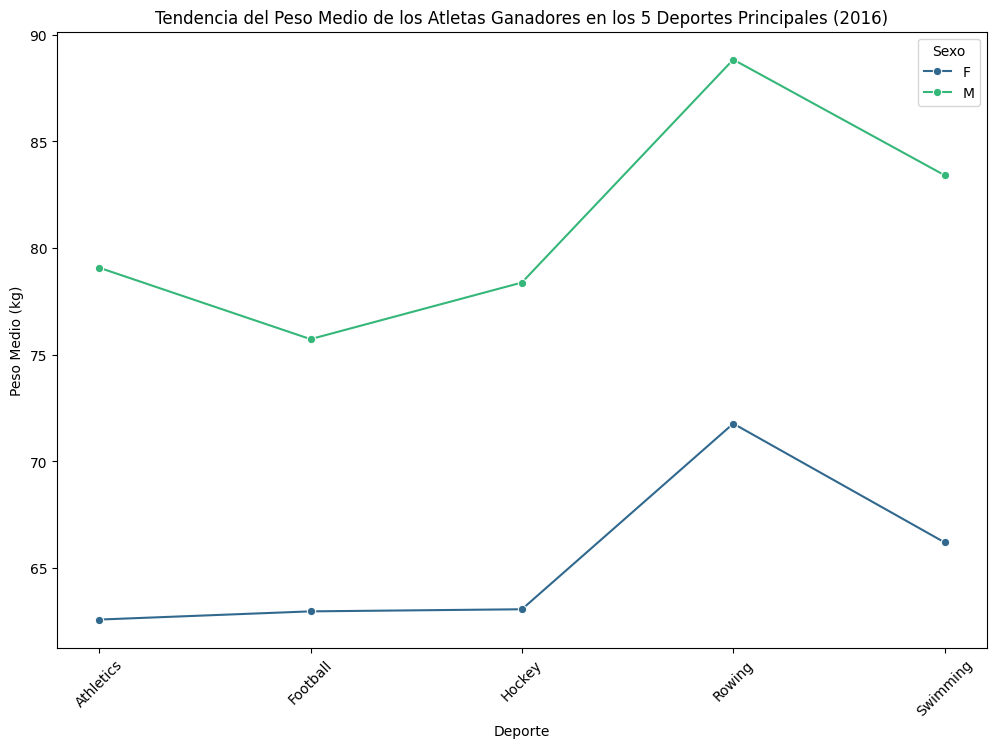

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Sport', y='Weight', hue='Sex', data=average_weight, marker='o', palette="viridis")
plt.title('Tendencia del Peso Medio de los Atletas Ganadores en los 5 Deportes Principales (2016)')
plt.xlabel('Deporte')
plt.ylabel('Peso Medio (kg)')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

El gráfico muestra que, en los Juegos Olímpicos de 2016, los atletas masculinos ganadores tienden a tener un peso medio más alto que las atletas femeninas en todos los deportes analizados. El peso medio más elevado para ambos géneros se observa en **Remo**, con los hombres alcanzando alrededor de 87 kg y las mujeres cerca de 70 kg. Por otro lado, **Atletismo** y **Fútbol** presentan los pesos medios más bajos, con los hombres rondando los 75 kg y las mujeres entre 60 y 65 kg. **Hockey** también muestra una tendencia de mayor peso en ambos géneros, aunque menos pronunciada.